# **05. Distribuciones muestrales y técnicas de evaluación de modelos.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv('/content/drive/MyDrive/BEDU/analisis_datos_python_2021/COVID-19 Survey Student Responses-clean.csv')
df.head(3)

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling


## Identificamos las variables numéricas

La columna `Time spent on TV` contiene algunos Nans.

In [4]:
df_num = df.select_dtypes('number')
df_num.iloc[18]

Age of Subject                21.0
Time spent on Online Class     0.0
Time spent on self study       4.0
Time spent on fitness          0.0
Time spent on sleep            7.0
Time spent on social media     7.0
Time spent on TV               NaN
Number of meals per day        2.0
Name: 18, dtype: float64

In [5]:
df.shape

(1182, 18)

In [6]:
#df['Time spent on TV'] = df['Time spent on TV'].fillna(0)
df_num = df_num.dropna()
df_num.shape

(1169, 8)

Las variables presentan bajos valores en la matriz de correlación.

In [7]:
df_num.corr()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day
Age of Subject,1.000000,-0.173336,0.009662,-0.053203,-0.117370,0.072160,-0.044976,-0.036677
Time spent on Online Class,-0.173336,1.000000,0.121002,-0.029979,-0.178298,-0.116901,-0.018378,0.001697
Time spent on self study,0.009662,0.121002,1.000000,0.032494,-0.222577,-0.161835,-0.134599,0.065848
Time spent on fitness,-0.053203,-0.029979,0.032494,1.000000,-0.038472,-0.069237,0.014589,0.128282
Time spent on sleep,-0.117370,-0.178298,-0.222577,-0.038472,1.000000,0.087794,0.085726,0.048393
Time spent on social media,0.072160,-0.116901,-0.161835,-0.069237,0.087794,1.000000,0.145371,0.031962
Time spent on TV,-0.044976,-0.018378,-0.134599,0.014589,0.085726,0.145371,1.000000,-0.010044
Number of meals per day,-0.036677,0.001697,0.065848,0.128282,0.048393,0.031962,-0.010044,1.000000


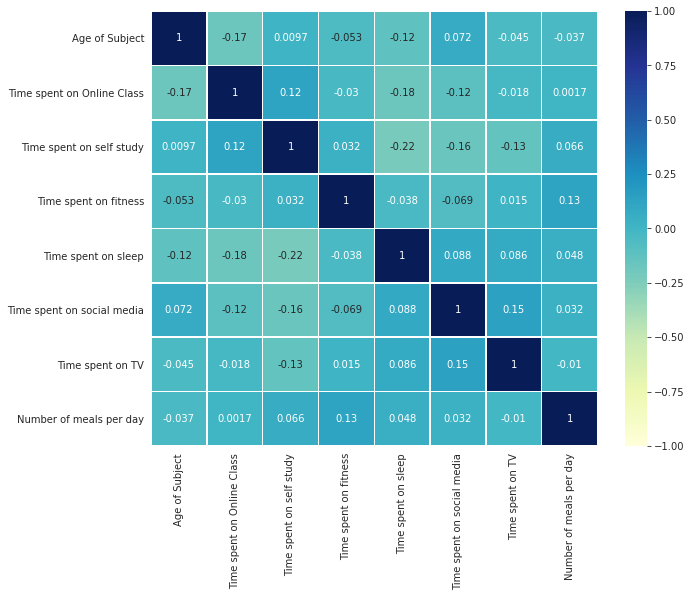

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_num.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Realizamos un bootstrap con 1000 elementos, tomando el 70% del dataset original.

In [10]:
def mean_limits(df_column):
  means=[]

  for i in range(100_000):
      sample = df_column.sample(frac=0.7, replace=True)
      means.append(sample.mean())
  serie_means = pd.Series(means)
  return serie_means

In [15]:
df_means = df_num.apply(lambda x:mean_limits(x),axis=0)

In [16]:
df_means

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day
0,20.309291,3.194438,2.830685,0.754462,7.856968,2.303606,1.069377,2.899756
1,20.179707,3.272372,2.890831,0.771394,7.895844,2.397372,1.019804,2.904645
2,20.426650,3.286858,2.950856,0.752078,7.887897,2.426589,1.002139,2.973105
3,20.272616,3.165465,2.879584,0.753484,7.897066,2.423533,1.000917,2.968215
4,19.768949,3.159658,2.862714,0.719377,7.890587,2.312592,0.966748,2.936430
...,...,...,...,...,...,...,...,...
99995,20.300733,3.163875,3.049144,0.760575,7.785208,2.364670,1.062897,2.925428
99996,20.035452,3.180990,2.887775,0.702078,7.898655,2.389120,1.029340,2.935208
99997,20.073350,3.263142,2.935452,0.802384,7.862225,2.307518,1.004707,2.930318
99998,20.243276,3.230073,3.000000,0.774328,7.792787,2.364914,0.963325,2.888753


In [37]:
def median_limits(df_column, serie_means, color='blue'):
  print('Simetría: ', serie_means.skew())
  print('Curtosis: ',serie_means.kurtosis())
  sns.histplot(serie_means, bins=50);
  limite_inferior = serie_means.quantile(0.025)
  limite_superior = serie_means.quantile(0.975)
  mean_of_intervals = ((df_column.mean() - limite_inferior) + (limite_superior - df_column.mean())) / 2
  plt.axvline(limite_inferior, color=color)
  plt.axvline(limite_superior, color=color)
  print(f'Intervalo de 95% de confianza: {df_column.mean()} +/- {mean_of_intervals}')


Simetría:  0.06960797051219761
Curtosis:  0.023260255812239006
Intervalo de 95% de confianza: 20.153122326775023 +/- 0.3795843520782398


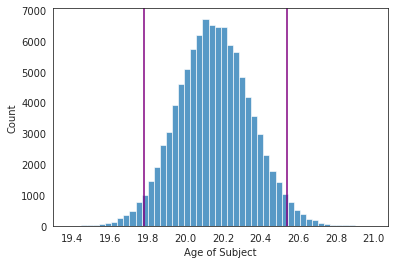

In [23]:
median_limits(df_num['Age of Subject'],df_means['Age of Subject'],'purple')

Simetría:  0.03619117051875566
Curtosis:  -0.0021498848899392797
Intervalo de 95% de confianza: 3.211163387510693 +/- 0.1434604217603912


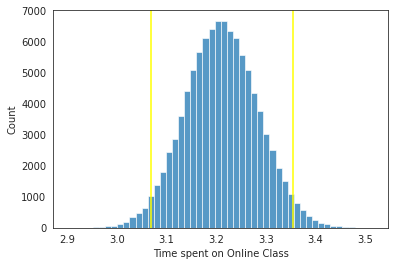

In [24]:
median_limits(df_num['Time spent on Online Class'],df_means['Time spent on Online Class'],'yellow')

Simetría:  0.050705400669696234
Curtosis:  0.01931661705269727
Intervalo de 95% de confianza: 2.9118905047048758 +/- 0.14743276283618578


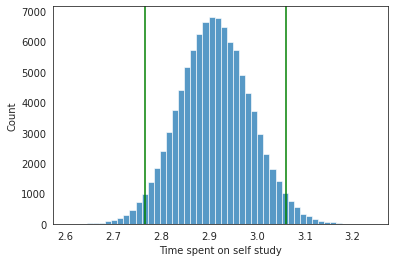

In [26]:
median_limits(df_num['Time spent on self study'],df_means['Time spent on self study'],'green')

Simetría:  0.06960797051219761
Curtosis:  0.023260255812239006
Intervalo de 95% de confianza: 20.153122326775023 +/- 0.3795843520782398


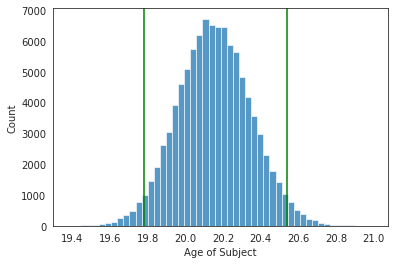

Simetría:  0.03619117051875566
Curtosis:  -0.0021498848899392797
Intervalo de 95% de confianza: 3.211163387510693 +/- 0.1434604217603912


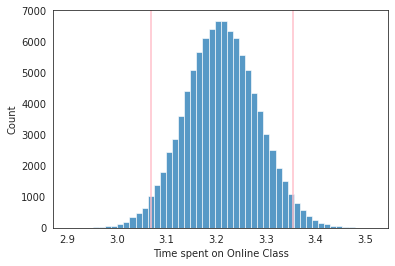

Simetría:  0.050705400669696234
Curtosis:  0.01931661705269727
Intervalo de 95% de confianza: 2.9118905047048758 +/- 0.14743276283618578


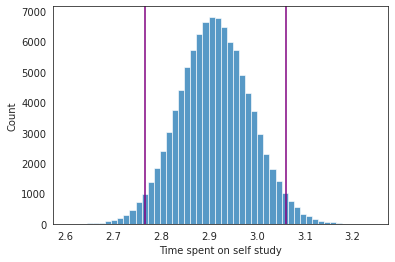

Simetría:  0.017966672016275765
Curtosis:  -0.0028927024940545998
Intervalo de 95% de confianza: 0.7646706586826346 +/- 0.04886919315403415


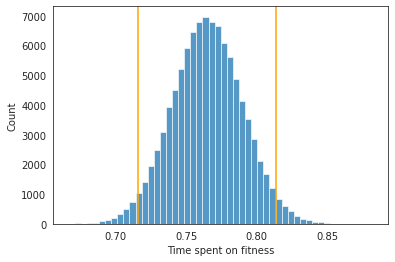

Simetría:  0.005122179699800596
Curtosis:  -0.017802725719526347
Intervalo de 95% de confianza: 7.867236954662104 +/- 0.11045232273838623


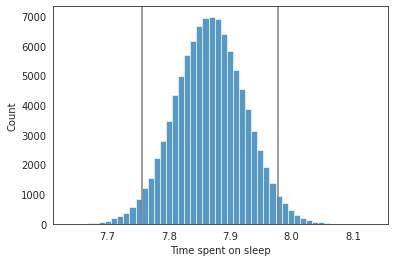

Simetría:  0.07050054133314651
Curtosis:  -0.0026169959025357237
Intervalo de 95% de confianza: 2.3552181351582555 +/- 0.1198349633251834


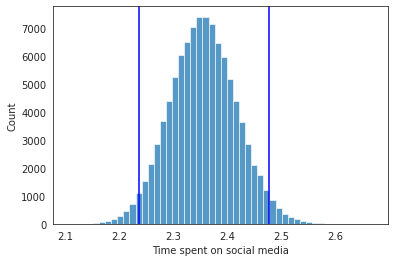

Simetría:  0.10035428581510188
Curtosis:  0.01826289861679875
Intervalo de 95% de confianza: 1.0252352437981176 +/- 0.08658312958435221


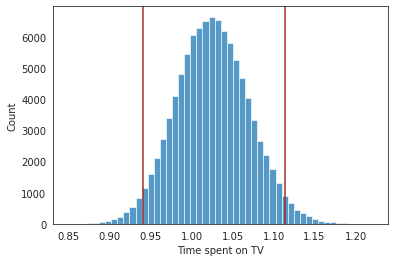

Simetría:  0.02446945227376741
Curtosis:  0.021815770889983988
Intervalo de 95% de confianza: 2.9187339606501284 +/- 0.0568459657701712


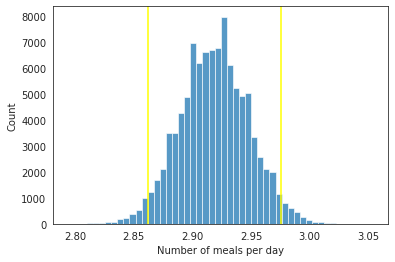

In [43]:
colors = ['green','pink','purple','orange','grey','blue','brown','yellow']
for i in range(8):
  median_limits(df_num[df_num.columns[i]],df_means[df_means.columns[i]],colors[i])
  plt.show()